# DSO105 Intermediate Stats L2 - Python (starting with page 7)

### Transforming data in Python

In [1]:
### import packages

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox

In [2]:
### following along with video golf example
golf = pd.read_excel('../../datasets/pgaTourData.xlsx')

In [3]:
golf.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868.0,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,2680487.0
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006.0,1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,2485203.0
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020.0,NaN,3.0,0.192,0.674,0.183,0.437,-0.137,2700018.0
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795.0,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,1986608.0
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421.0,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,1089763.0


#### Data wrangling

In [4]:
golf.dropna(inplace = True)

<AxesSubplot:>

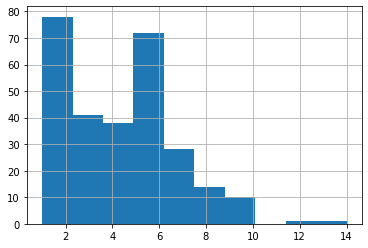

In [5]:
golf['Top 10'].hist()

C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Top 10', ylabel='Density'>

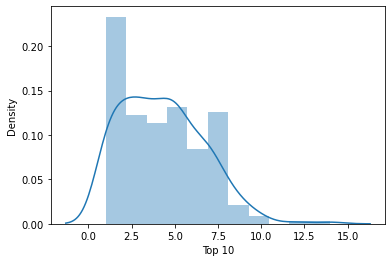

In [6]:
sns.distplot(golf['Top 10'])

In [7]:
## Pandas histograms allow missing arguments

In [8]:
golf['Top10SQRT'] = np.sqrt(golf['Top 10'])

In [9]:
golf.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,Top10SQRT
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006.0,1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,2485203.0,1.732051
16,Billy Horschel,86.0,67.80,2018,295.4,71.75,29.46,58.03,70.154,960.0,1.0,3.0,0.392,1.112,0.538,0.352,-0.169,4315200.0,1.732051
22,"Ted Potter, Jr.",87.0,66.83,2018,286.0,63.03,28.45,57.51,71.024,744.0,1.0,1.0,0.074,-0.094,-0.074,-0.200,0.105,1976198.0,1.000000
23,Austin Cook,107.0,66.76,2018,292.3,66.51,28.72,62.02,70.469,1060.0,1.0,3.0,0.315,0.569,0.120,-0.045,0.179,2448920.0,1.732051
27,Ian Poulter,73.0,66.41,2018,293.6,67.01,28.97,57.11,70.593,1030.0,1.0,4.0,0.223,0.850,0.141,0.435,0.051,2714450.0,2.000000


C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Top10SQRT', ylabel='Density'>

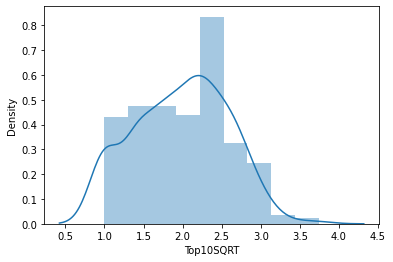

In [10]:
sns.distplot(golf['Top10SQRT'])

In [11]:
## looking more approx. normal
## try .log transofrmation now from NumPy package

In [12]:
golf['Top10LOG'] = np.log(golf['Top 10'])

In [13]:
golf.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,Top10SQRT,Top10LOG
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006.0,1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,2485203.0,1.732051,1.098612
16,Billy Horschel,86.0,67.80,2018,295.4,71.75,29.46,58.03,70.154,960.0,1.0,3.0,0.392,1.112,0.538,0.352,-0.169,4315200.0,1.732051,1.098612
22,"Ted Potter, Jr.",87.0,66.83,2018,286.0,63.03,28.45,57.51,71.024,744.0,1.0,1.0,0.074,-0.094,-0.074,-0.200,0.105,1976198.0,1.000000,0.000000
23,Austin Cook,107.0,66.76,2018,292.3,66.51,28.72,62.02,70.469,1060.0,1.0,3.0,0.315,0.569,0.120,-0.045,0.179,2448920.0,1.732051,1.098612
27,Ian Poulter,73.0,66.41,2018,293.6,67.01,28.97,57.11,70.593,1030.0,1.0,4.0,0.223,0.850,0.141,0.435,0.051,2714450.0,2.000000,1.386294


C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Top10LOG', ylabel='Density'>

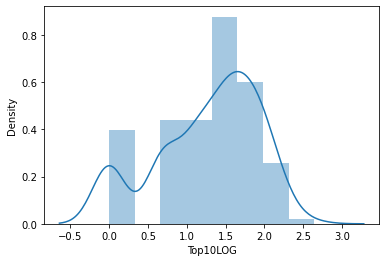

In [14]:
sns.distplot(golf['Top10LOG'])
## no need to log it

#### practicing squaring and cubing

In [15]:
golf['SGARGsq'] = golf['SG:ARG'] ** 2
## ** 2 says to square the variable

In [16]:
golf.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,...,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,Top10SQRT,Top10LOG,SGARGsq
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006.0,...,3.0,-0.058,0.337,-0.012,0.213,0.194,2485203.0,1.732051,1.098612,0.037636
16,Billy Horschel,86.0,67.80,2018,295.4,71.75,29.46,58.03,70.154,960.0,...,3.0,0.392,1.112,0.538,0.352,-0.169,4315200.0,1.732051,1.098612,0.028561
22,"Ted Potter, Jr.",87.0,66.83,2018,286.0,63.03,28.45,57.51,71.024,744.0,...,1.0,0.074,-0.094,-0.074,-0.200,0.105,1976198.0,1.000000,0.000000,0.011025
23,Austin Cook,107.0,66.76,2018,292.3,66.51,28.72,62.02,70.469,1060.0,...,3.0,0.315,0.569,0.120,-0.045,0.179,2448920.0,1.732051,1.098612,0.032041
27,Ian Poulter,73.0,66.41,2018,293.6,67.01,28.97,57.11,70.593,1030.0,...,4.0,0.223,0.850,0.141,0.435,0.051,2714450.0,2.000000,1.386294,0.002601


C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SGARGsq', ylabel='Density'>

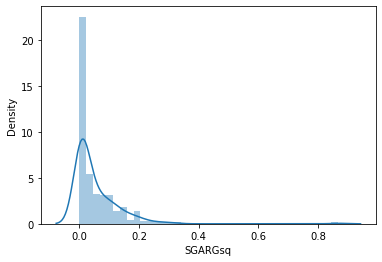

In [17]:
sns.distplot(golf['SGARGsq'])
## a not very useful histogram

In [18]:
## now cubing

In [19]:
golf['SGARGcube'] = golf['SG:ARG'] ** 3

In [20]:
golf.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,...,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,Top10SQRT,Top10LOG,SGARGsq,SGARGcube
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006.0,...,-0.058,0.337,-0.012,0.213,0.194,2485203.0,1.732051,1.098612,0.037636,0.007301
16,Billy Horschel,86.0,67.80,2018,295.4,71.75,29.46,58.03,70.154,960.0,...,0.392,1.112,0.538,0.352,-0.169,4315200.0,1.732051,1.098612,0.028561,-0.004827
22,"Ted Potter, Jr.",87.0,66.83,2018,286.0,63.03,28.45,57.51,71.024,744.0,...,0.074,-0.094,-0.074,-0.200,0.105,1976198.0,1.000000,0.000000,0.011025,0.001158
23,Austin Cook,107.0,66.76,2018,292.3,66.51,28.72,62.02,70.469,1060.0,...,0.315,0.569,0.120,-0.045,0.179,2448920.0,1.732051,1.098612,0.032041,0.005735
27,Ian Poulter,73.0,66.41,2018,293.6,67.01,28.97,57.11,70.593,1030.0,...,0.223,0.850,0.141,0.435,0.051,2714450.0,2.000000,1.386294,0.002601,0.000133


C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SGARGcube', ylabel='Density'>

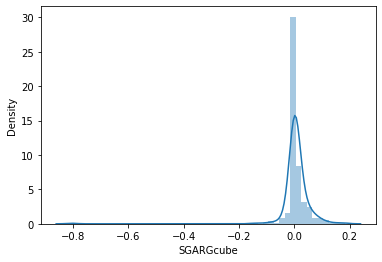

In [21]:
sns.distplot(golf['SGARGcube'])
## also not helpful

Transformations in Python

Data transformations can also be done in Python. You'll use the same anime data that you used to transform data in R.

In [3]:
anime = pd.read_csv('../../datasets/anime.csv')

In [4]:
anime.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012


#### Visualizing Transformations

pandas has a function called .hist() that works pretty well for data normalization visualization, because it just ignores missing values. 

That means that you don't need to do a whole lot of data cleaning.

Here's how .hist() works:

<AxesSubplot:>

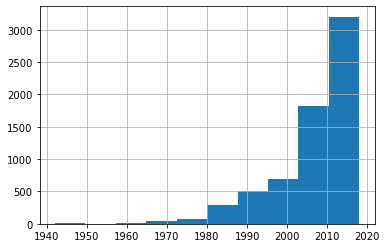

In [24]:
anime.aired_from_year.hist()

If you want a fitted curve, you'll need to pull from seaborn, using the distplot() function.

C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='aired_from_year', ylabel='Density'>

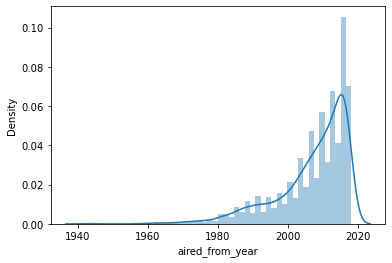

In [25]:
sns.distplot(anime['aired_from_year'])

#### Transforming Positively Skewed Data

Take a look at the scored_by variable:

<AxesSubplot:>

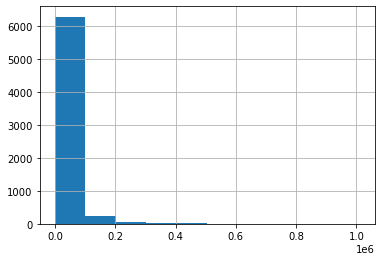

In [26]:
anime.scored_by.hist()

It is quite positively skewed!

C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='scored_by', ylabel='Density'>

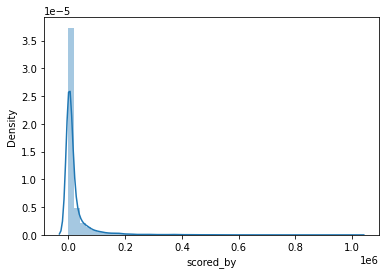

In [27]:
## let's do a sns histogram, jsut to see the line
sns.distplot(anime['scored_by'])
## tail is to the the right - it looks to be positively skewed

#### Using np.sqrt()

So, try a square root transformation first, using the function from numpy called .sqrt():

In [28]:
anime['scored_bySQRT'] = np.sqrt(anime['scored_by'])

<AxesSubplot:>

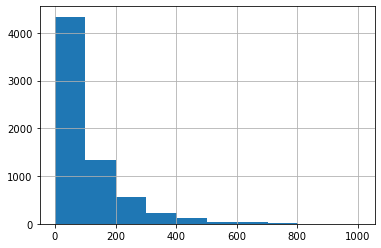

In [29]:
anime.scored_bySQRT.hist()

Looking at the above graph, that is better, but still no where close to normal.

#### Using np.log()

So, try a log transformation!

In [30]:
anime['scored_byLOG'] = np.log(anime['scored_by'])

C:\Users\nolan\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [31]:
## looks like Python is telling us if we do this there be infinite values

#### Dealing with Infinite Data

If you try and run the histogram of your log transformed data when you've been given a warning about infinite values, you will get this error

But don't panic! There is a fix, and a relatively easy one at that. Dropping na values will also get rid of infinite values! Simply call the dropna() function on your dataset.

In [32]:
anime.dropna(inplace = True)
## rerun the cell above

<AxesSubplot:>

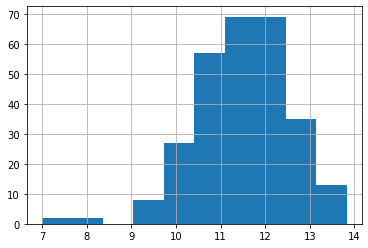

In [33]:
anime.scored_byLOG.hist()

That doesn't look too shabby! Not quite normal, but you'll take it.

#### Transforming Negatively Skewed Data

In order to transform negatively skewed data, you will either square or cube your data.

##### Squaring the Variable

How about trying to transform the aired_from_year variable that you looked at earlier? It had a relatively large negative skew to it. So, start by squaring your data. The ** means that you are raising the variable to a power of 2.

In [34]:
anime['aired_from_yearSQ'] = anime['aired_from_year']**2

Then take a look at the histogram to assess your progress:

<AxesSubplot:>

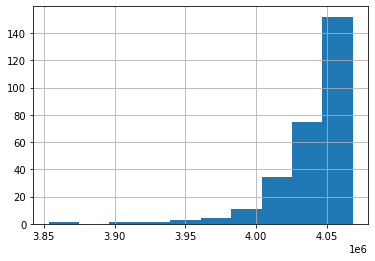

In [35]:
anime.aired_from_yearSQ.hist()

##### Cubing the Variable

The histogram above still does not look very normal, which means that it is time to try cubing it!

In [36]:
anime['aired_from_yearCUBE'] = anime['aired_from_year']**3

<AxesSubplot:>

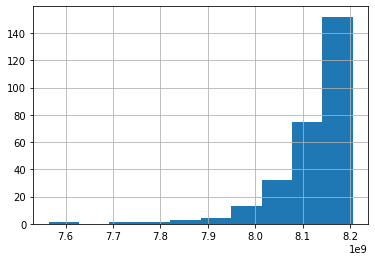

In [37]:
anime.aired_from_yearCUBE.hist()

This has not made a lot of impact, but it is slightly better than the original, so you most likely want to use the cubed transformation

#### BoxCox Transformation

Just like the Tukey's Ladder of Power Transformations in R, you can transform by power in Python as well. 

However, the Python version, called boxcox(), has limited functionality. 

It does not seem to work well for negatively skewed data (so check your results very carefully!), and it does not automatically transform your data, unlike R. It just runs off a power system.

Then you can call the function into a new variable, like you have been doing

In [38]:
anime['scored_byLOG1'] = boxcox(anime['scored_by'], 0)

Use the boxcox() function, and specify the variable. Then the last argument is the power value that you learned about at the beginning of this lesson. A power of 0 is a log transformation.


<img src="../media/common-transformations.png" align="left" alt="COE image" width = "600">

C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='scored_byLOG1', ylabel='Density'>

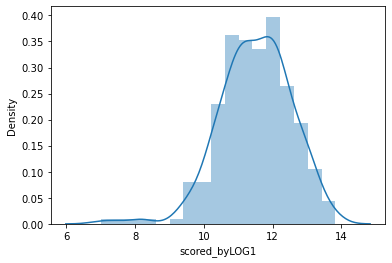

In [39]:
sns.distplot(anime['scored_byLOG1'])
## looks a bit more normal

In [40]:
#### Page 8 (activity)

Using the cruise ship data from last lesson, determine whether each continuous variable is positively skewed, negatively skewed, or normally distributed. Then perform the correct transformations to get as close to the normal distribution as possible for each variable.

In [5]:
cruise_ship = pd.read_excel('../../datasets/cruise_ship.xlsx')

In [6]:
cruise_ship.head()

,Ship,Line,YearBlt,Tonnage,passngrs,Length,Cabins,Crew,PassSpcR,outcab
0,Journey,Azamara,2007,30277,694,594,355,355,42.64,329
1,Quest,Azamara,2007,30277,694,594,355,355,42.64,329
2,Celebration,Carnival,1987,47262,1486,722,743,670,31.80,453
3,Conquest,Carnival,2002,110000,2974,953,1488,1910,36.99,892
4,Destiny,Carnival,1996,101353,2642,892,1321,1000,38.36,740


#### Look at all distributions of continuous variables

C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearBlt', ylabel='Density'>

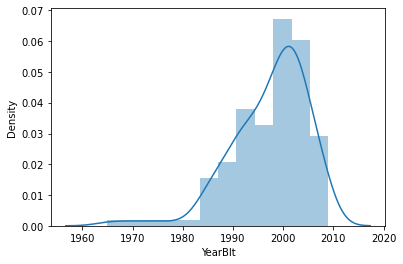

In [43]:
sns.distplot(cruise_ship['YearBlt'])
## looks negatively skewed

##### transforming YearBlt

In [44]:
cruise_ship['YearBltSQ'] = cruise_ship['YearBlt']**2

C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearBltSQ', ylabel='Density'>

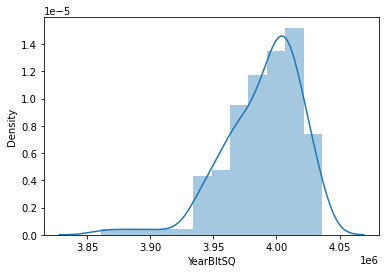

In [45]:
sns.distplot(cruise_ship['YearBltSQ'])

In [46]:
cruise_ship['YearBltCUBE'] = cruise_ship['YearBlt']**3

C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearBltCUBE', ylabel='Density'>

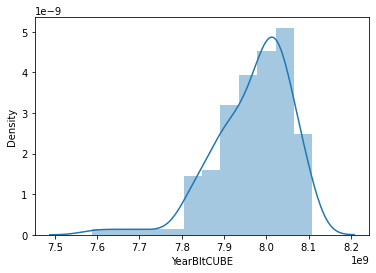

In [47]:
sns.distplot(cruise_ship['YearBltCUBE'])
## about as normal as we can get it

##### Tonnage

C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tonnage', ylabel='Density'>

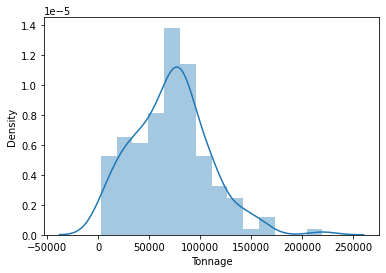

In [48]:
sns.distplot(cruise_ship['Tonnage'])
## positively skewed

In [49]:
cruise_ship['TonnageSQRT'] = np.sqrt(cruise_ship['Tonnage'])

C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TonnageSQRT', ylabel='Density'>

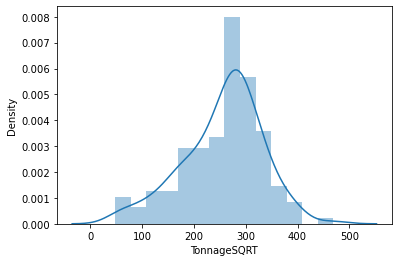

In [50]:
sns.distplot(cruise_ship['TonnageSQRT'])
## looks more normal now

##### passngrs

C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='passngrs', ylabel='Density'>

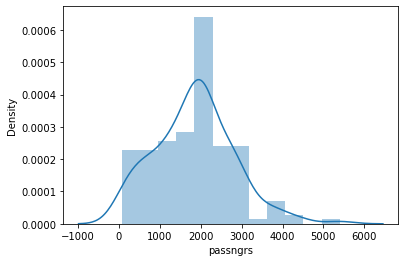

In [51]:
sns.distplot(cruise_ship['passngrs'])
## positively skewed

In [52]:
cruise_ship['passngrsSQRT'] = np.sqrt(cruise_ship['passngrs'])

C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='passngrsSQRT', ylabel='Density'>

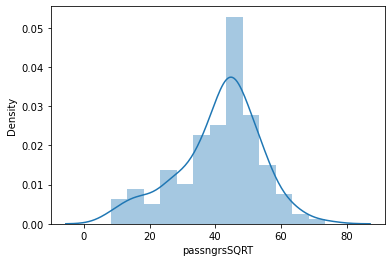

In [53]:
sns.distplot(cruise_ship['passngrsSQRT'])
## looks more normally distributed now

##### Length

C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length', ylabel='Density'>

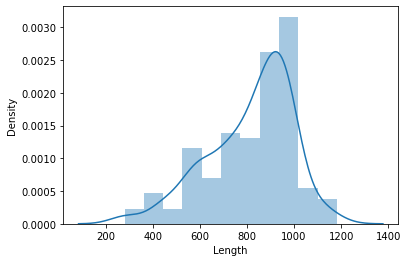

In [54]:
sns.distplot(cruise_ship['Length'])
## negatively skewed

In [55]:
cruise_ship['LengthSQ'] = cruise_ship['Length']**2

C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LengthSQ', ylabel='Density'>

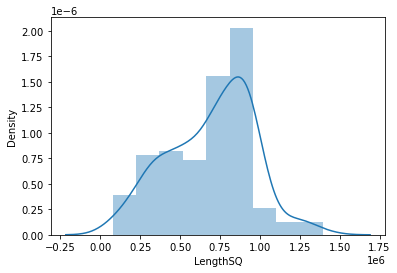

In [56]:
sns.distplot(cruise_ship['LengthSQ'])
## maybe it is slightly more normal, arguably the same though

##### Cabins

C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cabins', ylabel='Density'>

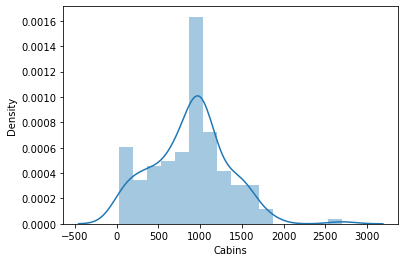

In [57]:
sns.distplot(cruise_ship['Cabins'])
## positively skewed

In [58]:
cruise_ship['CabinsSQRT'] = np.sqrt(cruise_ship['Cabins'])

C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CabinsSQRT', ylabel='Density'>

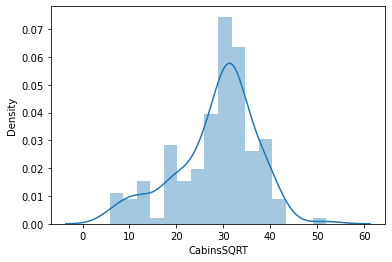

In [59]:
sns.distplot(cruise_ship['CabinsSQRT'])
## little more filled in and normal looking now

##### Crew

C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Crew', ylabel='Density'>

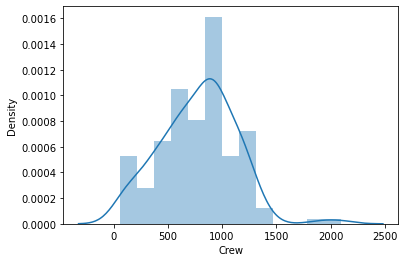

In [60]:
sns.distplot(cruise_ship['Crew'])
## positively skewed

In [61]:
cruise_ship['CrewSQRT'] = np.sqrt(cruise_ship['Crew'])

C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CrewSQRT', ylabel='Density'>

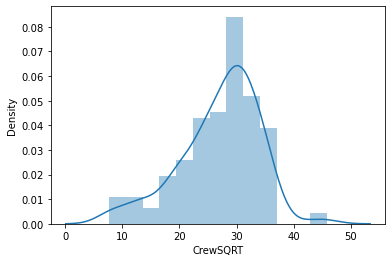

In [62]:
sns.distplot(cruise_ship['CrewSQRT'])
## a little more normal

##### PassSpcR

C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PassSpcR', ylabel='Density'>

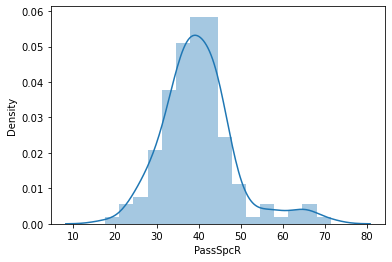

In [65]:
sns.distplot(cruise_ship['PassSpcR'])
## pretty close to normal, but it is positively skewed

In [66]:
cruise_ship['PassSpcRsqrt'] = np.sqrt(cruise_ship['PassSpcR'])

C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PassSpcRsqrt', ylabel='Density'>

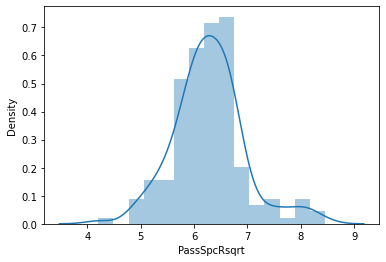

In [68]:
sns.distplot(cruise_ship['PassSpcRsqrt'])
## maybe a little more normal looking

##### outcab

C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='outcab', ylabel='Density'>

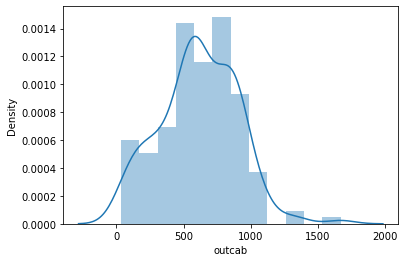

In [71]:
sns.distplot(cruise_ship['outcab'])
## positively skewed

In [72]:
cruise_ship['outcabSQRT'] = np.sqrt(cruise_ship['outcab'])

C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='outcabSQRT', ylabel='Density'>

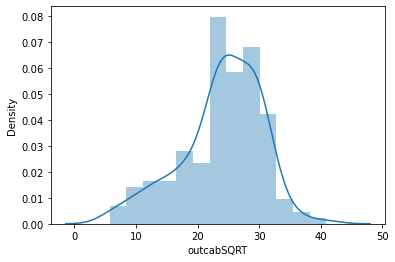

In [74]:
sns.distplot(cruise_ship['outcabSQRT'])
## a little more normal

## playing around with new .displot

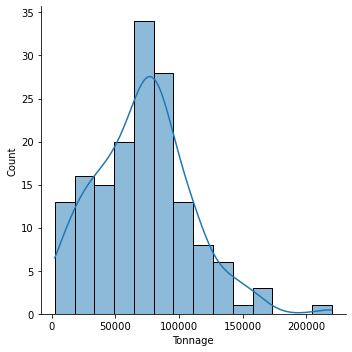

In [77]:
sns.displot(data = cruise_ship, x = "Tonnage", kde=True)
## this will be place .distplot

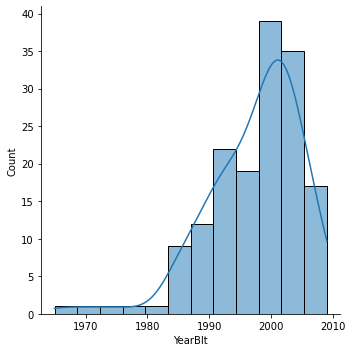

In [80]:
sns.displot(data = cruise_ship, x = "YearBlt", kde = True) ## negatively skewed

C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\nolan\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


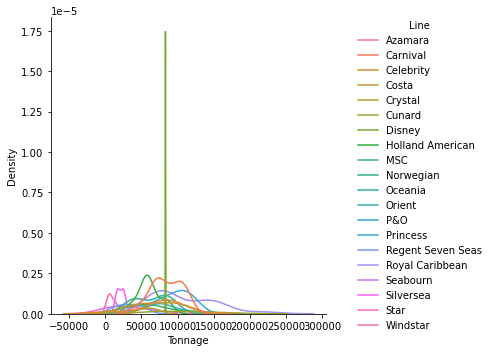

In [81]:
sns.displot(data = cruise_ship, x="Tonnage", hue="Line", kind="kde")

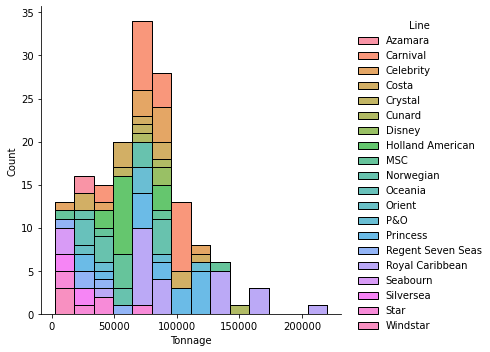

In [82]:
sns.displot(data = cruise_ship, x = "Tonnage", hue = "Line", multiple = "stack")

### .displot() replaces .distplot()

#### .displot(data=datasetName, x = "columnName", kde = True) 

with kde adding the best fit line

In [75]:
#### Page 9 (activity solution)

In [76]:
#### Page 10 Key Terms

list

Skew -> Non-parametric distribution that is not normal horizontally from side to side.

Negative Skew -> A distribution that has the tail to the left and the bulk of data to the right.

Positive Skew -> A distribution that has the tail to the right and the bulk of the data to the left.

Kurtosis -> Non-parametric distribution that is not normally vertically, from top to bottom.

Leptokurtic -> A positively kurtotic distribution that looks taller than the normal distribution.

Platykurtic -> A negatively kurtotic distribution that looks flatter than the normal distribution.

Mesokurtic -> The normal distribution's kurtosis.

Power -> Defined as 1-slope, power is on a ladder system that determines how data can be transformed.

Reciprocal or Reflection -> The exact opposite of your current data; flipped.


##### Key R Libraries

rcompanion -> Used to test for the normal distribution.

IDPmisc -> A library used to screen out missing values.

##### Key R Code

plotNormalHistogram() -> Easily creates a histogram with a best-fit curve to show how it matches the normal distribution.

sqrt() -> Takes the square root of a variable.

log() -> Takes the log of a variable.

NaRV.omit() -> Removes missing and infinite values from a dataset.

transformTukey -> Automatically transforms your data to approximate the normal distribution as best as possible.

##### Key Python Packages

boxcox -> A package that houses the BoxCox transformation.

##### Key Python Code

np.sqrt() -> Takes the square root of a variable.

np.log() -> Takes the log of a variable.

.dropna(inplace=True) -> Drops missing values.

boxcox() -> Performs a BoxCox transformation based on the power level you choose.